In [1]:
import numpy as np
import pandas as pd
import itertools
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
b = 10
def create(n, m, c, t):
    vals = {"sa": [], "ga": []}
    for alg in vals:
        for i in itertools.count():
            try:
                df = pd.read_csv("results/{}_n{}_m{}_c{}_{}_{}.csv".format(alg, n, m, c, t, i))
            except FileNotFoundError as e:
                break
            vals[alg].append((df['time'].values, df['score'].values))
    xmin_sa = min([time[0] for time, _ in vals["sa"]])
    xmin_ga = min([time[0] for time, _ in vals["ga"]])
    xmax_sa = max([time[-1] for time, _ in vals["sa"]])
    xmax_ga = max([time[-1] for time, _ in vals["ga"]])
    x = {"sa": np.logspace(start=math.log(xmin_sa, b), stop=math.log(xmax_sa, b), num=100, base=b),
         "ga": np.logspace(start=math.log(xmin_ga, b), stop=math.log(xmax_ga, b), num=100, base=b)}
    y = {"sa": [], "ga": []}
    for alg in vals:
        for time, score in vals[alg]:
            y[alg].append([np.interp(xi, time, score) for xi in x[alg]])
        y[alg] = np.average(y[alg], axis=0)
    return x, y

def plot(n, m, c, t):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xscale('log', basex=b)
    
    t_map = {
    "u": "Uniform graph with {} nodes".format(n),
    "c": "Clustered graph with {} nodes, {} clusters".format(n, c),
    "m": "Mixed graph with {} nodes, {} clusters".format(n, c)
    }
    x, y = create(n, m, c, t)
    plt.plot(x["sa"], y["sa"], label="SA")
    plt.plot(x["ga"], y["ga"], label="GA")
    
    # Plot optimal (bruteforce) if it exists
    try:
        df = pd.read_csv("results/brute_n{}_m{}_c{}_{}.csv".format(n, m, c, t))
        score = df['score'].values[0]
        plt.axhline(y=score, color='r', linestyle='--', label="Optimal")
    except FileNotFoundError as e: pass

    plt.xlim(min(x["sa"][0], x["ga"][0])*0.5, max(x["sa"][-1], x["ga"][-1])*2)
    plt.legend()
    plt.title("{}, {} vehicles".format(t_map[t], m))
    plt.xlabel("Time (μs)")
    plt.ylabel("Average score");
    fig.savefig("img/n{}_m{}_c{}_{}.png".format(n, m, c, t), dpi=300)
    plt.show()
    plt.close()

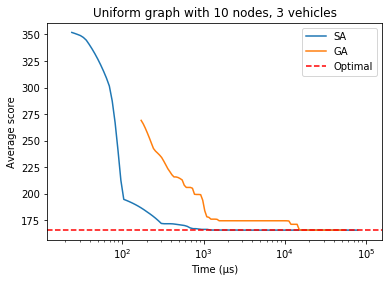

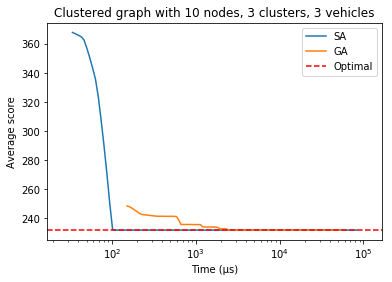

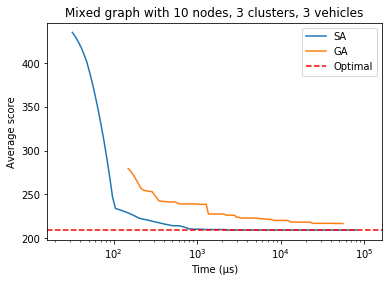

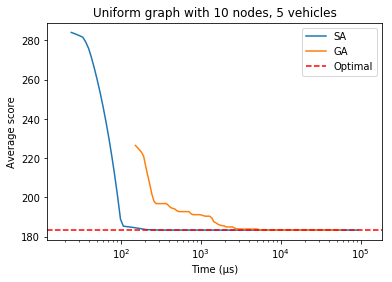

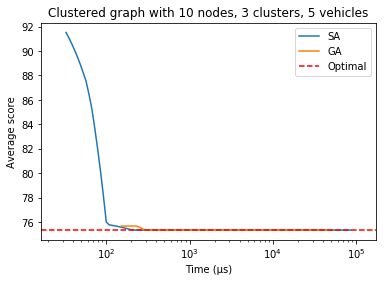

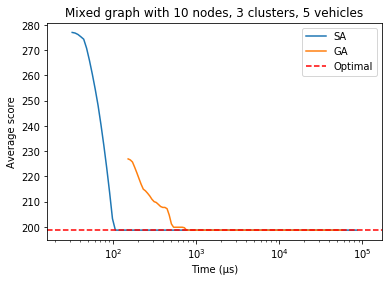

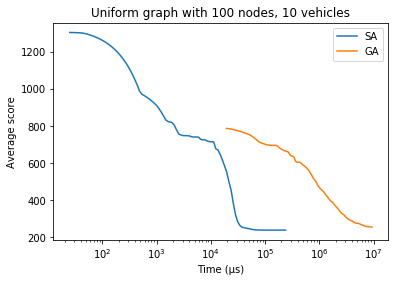

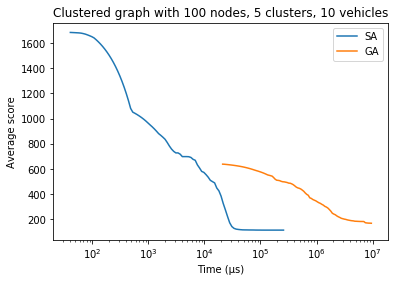

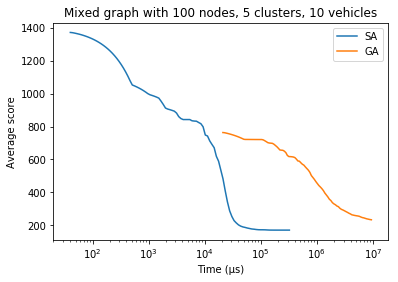

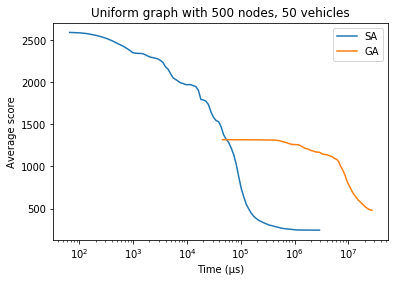

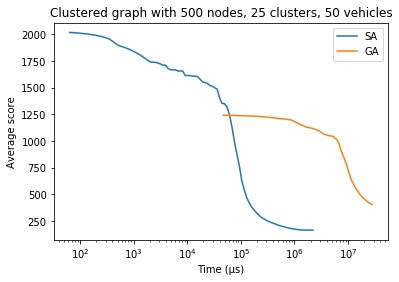

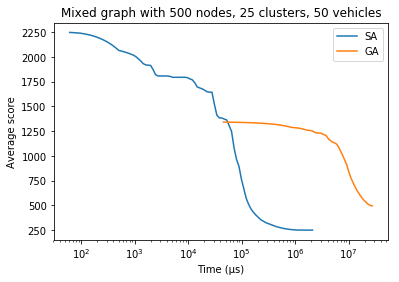

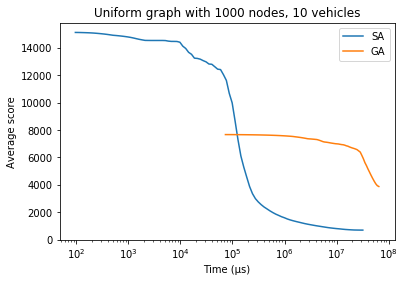

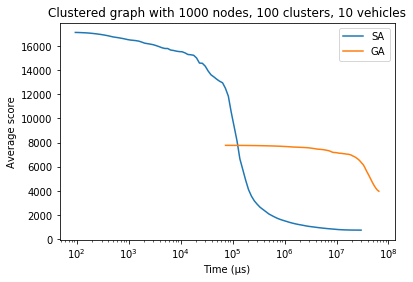

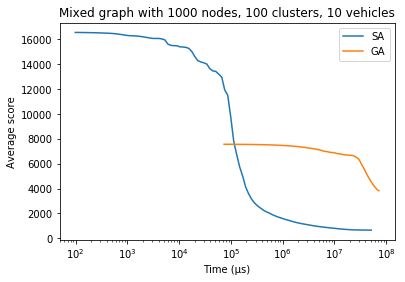

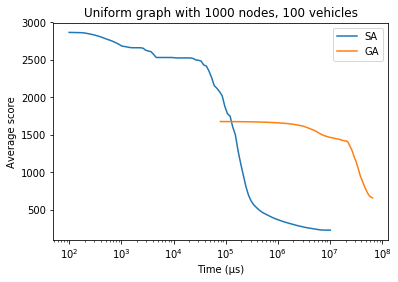

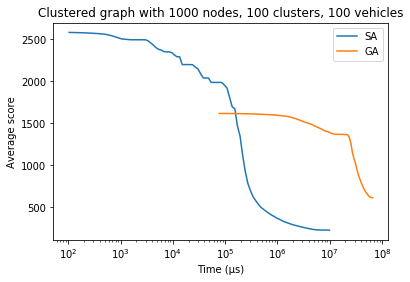

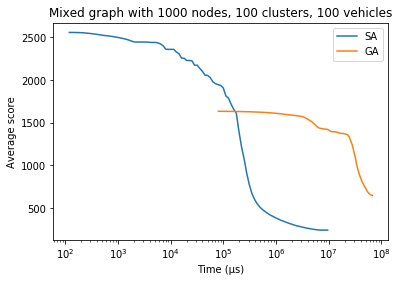

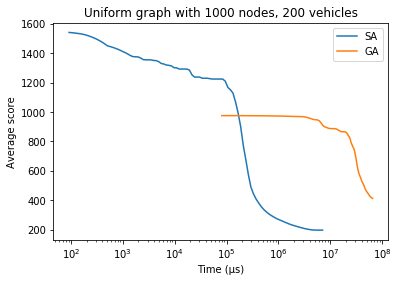

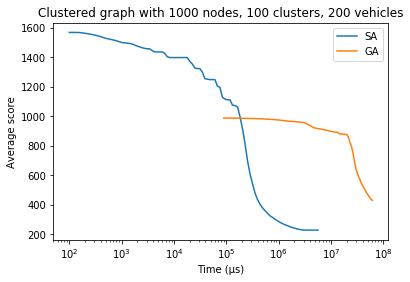

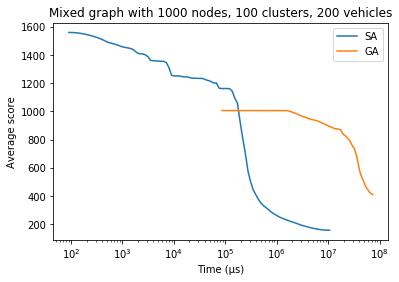

In [3]:
cases = [
    (10, 3, 3),
    (10, 5, 3),
    (100, 10, 5),
    (500, 50, 25),
    (1000, 10, 100),
    (1000, 100, 100),
    (1000, 200, 100)
]

for case in cases:
    for t in ["u", "c", "m"]:
        plot(*case, t)